## AIF module demo

### Import modules

In [24]:
import sys
import matplotlib.pyplot as plt
import numpy as np
sys.path.append('..')
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


### Classic Parker AIF
Create a Parker AIF object. This can be used to return arterial plasma Gd concentration for any time points.

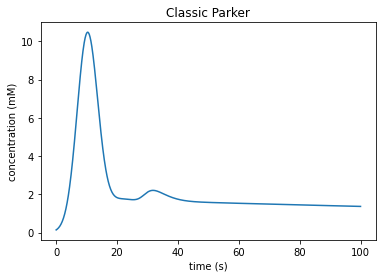

In [26]:
import aifs
# Create the AIF object
parker_aif = aifs.Parker(hct=0.42)

# Plot concentration for specific times
t_parker = np.linspace(0.,100.,1000)
c_ap_parker = parker_aif.c_ap(t_parker)
plt.plot(t_parker, c_ap_parker)
plt.xlabel('time (s)')
plt.ylabel('concentration (mM)')
plt.title('Classic Parker');

### Patient-specific AIF
Create an individual AIF object based on a series of time-concentration data points. 
The object can then be used to generate concentrations at arbitrary times.

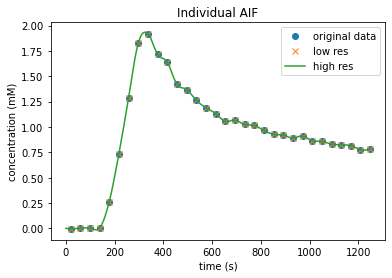

In [19]:
# define concentration-time measurements
t_patient = np.array([19.810000,59.430000,99.050000,138.670000,178.290000,217.910000,257.530000,297.150000,336.770000,376.390000,416.010000,455.630000,495.250000,534.870000,574.490000,614.110000,653.730000,693.350000,732.970000,772.590000,812.210000,851.830000,891.450000,931.070000,970.690000,1010.310000,1049.930000,1089.550000,1129.170000,1168.790000,1208.410000,1248.030000])
c_p_patient = np.array([-0.004937,0.002523,0.002364,0.005698,0.264946,0.738344,1.289008,1.826013,1.919158,1.720187,1.636699,1.423867,1.368308,1.263610,1.190378,1.132603,1.056400,1.066964,1.025331,1.015179,0.965908,0.928219,0.919029,0.892000,0.909929,0.865766,0.857195,0.831985,0.823747,0.815591,0.776007,0.783767])

# create AIF object from measurements
patient_aif = aifs.patient_specific(t_patient, c_p_patient)

# get AIF conc at original temporal resolution
c_p_patient_lowres = patient_aif.c_ap(t_patient)

# get (interpolated) AIF conc at higher temporal resolution
t_patient_highres = np.linspace(0., max(t_patient), 200) # required time points
c_p_patient_highres = patient_aif.c_ap(t_patient_highres)

plt.plot(t_patient, c_p_patient, 'o', label='original data')
plt.plot(t_patient, c_p_patient_lowres, 'x', label='low res')
plt.plot(t_patient_highres, c_p_patient_highres, '-', label='high res')
plt.legend()
plt.xlabel('time (s)')
plt.ylabel('concentration (mM)')
plt.title('Individual AIF');

### Classic Parker AIF with time delay


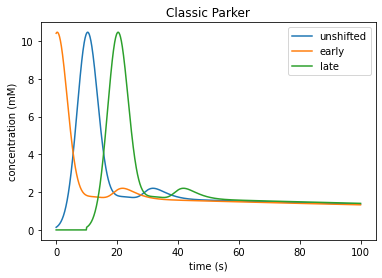

In [20]:
c_ap_parker_early = parker_aif.c_ap(t_parker+10)
c_ap_parker_late = parker_aif.c_ap(t_parker-10)
plt.plot(t_parker, c_ap_parker,label='unshifted')
plt.plot(t_parker, c_ap_parker_early,label='early')
plt.plot(t_parker, c_ap_parker_late,label='late')
plt.xlabel('time (s)')
plt.ylabel('concentration (mM)')
plt.legend()
plt.title('Classic Parker');

### Patient-specific AIF with time delay

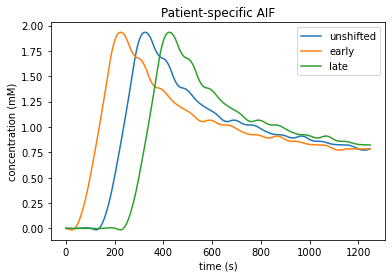

In [21]:
c_p_patient_highres_early = patient_aif.c_ap(t_patient_highres+100)
c_p_patient_highres_late = patient_aif.c_ap(t_patient_highres-100)

plt.plot(t_patient_highres, c_p_patient_highres, label='unshifted')
plt.plot(t_patient_highres, c_p_patient_highres_early, label='early')
plt.plot(t_patient_highres, c_p_patient_highres_late, label='late')
plt.xlabel('time (s)')
plt.ylabel('concentration (mM)')
plt.legend()
plt.title('Patient-specific AIF');

### AIFs using in Manning et al., MRM (2021) and Heye et al., NeuroImage (2016)

Text(0, 0.5, 'concentration (mM)')

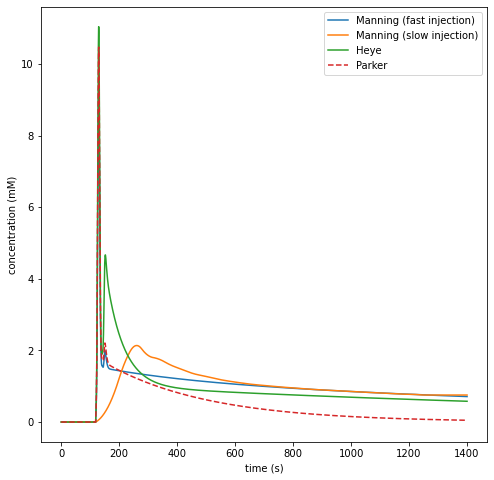

In [36]:
manning_fast_aif = aifs.manning_fast(hct=0.42, t_start=3*39.62) # fast injection, Manning et al., MRM (2021)
manning_slow_aif = aifs.ManningSlow() # slow injection, Manning et al., MRM (2021)
heye_aif = aifs.Heye(hct=0.45, t_start=3*39.62) # Heye et al., NeuroImage (2016)
parker_aif = aifs.Parker(hct=0.42, t_start=3*39.62)

t = np.arange(0, 1400, 0.1)

# Plot concentration for specific times

plt.figure(0, figsize=(8,8))
plt.plot(t, manning_fast_aif.c_ap(t), label='Manning (fast injection)')
plt.plot(t, manning_slow_aif.c_ap(t), label='Manning (slow injection)')
plt.plot(t, heye_aif.c_ap(t), label='Heye')
plt.plot(t, parker_aif.c_ap(t), '--', label='Parker')
plt.legend()
plt.xlabel('time (s)')
plt.ylabel('concentration (mM)')